In [1]:
import math
import matplotlib.pyplot as plt

In [31]:
x0, y0, radius, num_points = 0.5, 0.5, 0.6, 20
coord_points = []
for i in range(0, 360, int(360 / num_points)):
    coord_points.append((radius * math.cos(i * math.pi / 180) + x0, radius * math.sin(i * math.pi / 180) + y0))

In [49]:
def draw_background(ax, points):
    for (x, y) in points:
        ax.plot(x, y, 'ro')
    ax.set_xlim(-0.3, 1.3)
    ax.set_ylim(-0.3, 1.3)
    ax.set_ylabel('y, meters')
    ax.set_xlabel('x, meters')
    ax.grid(True)

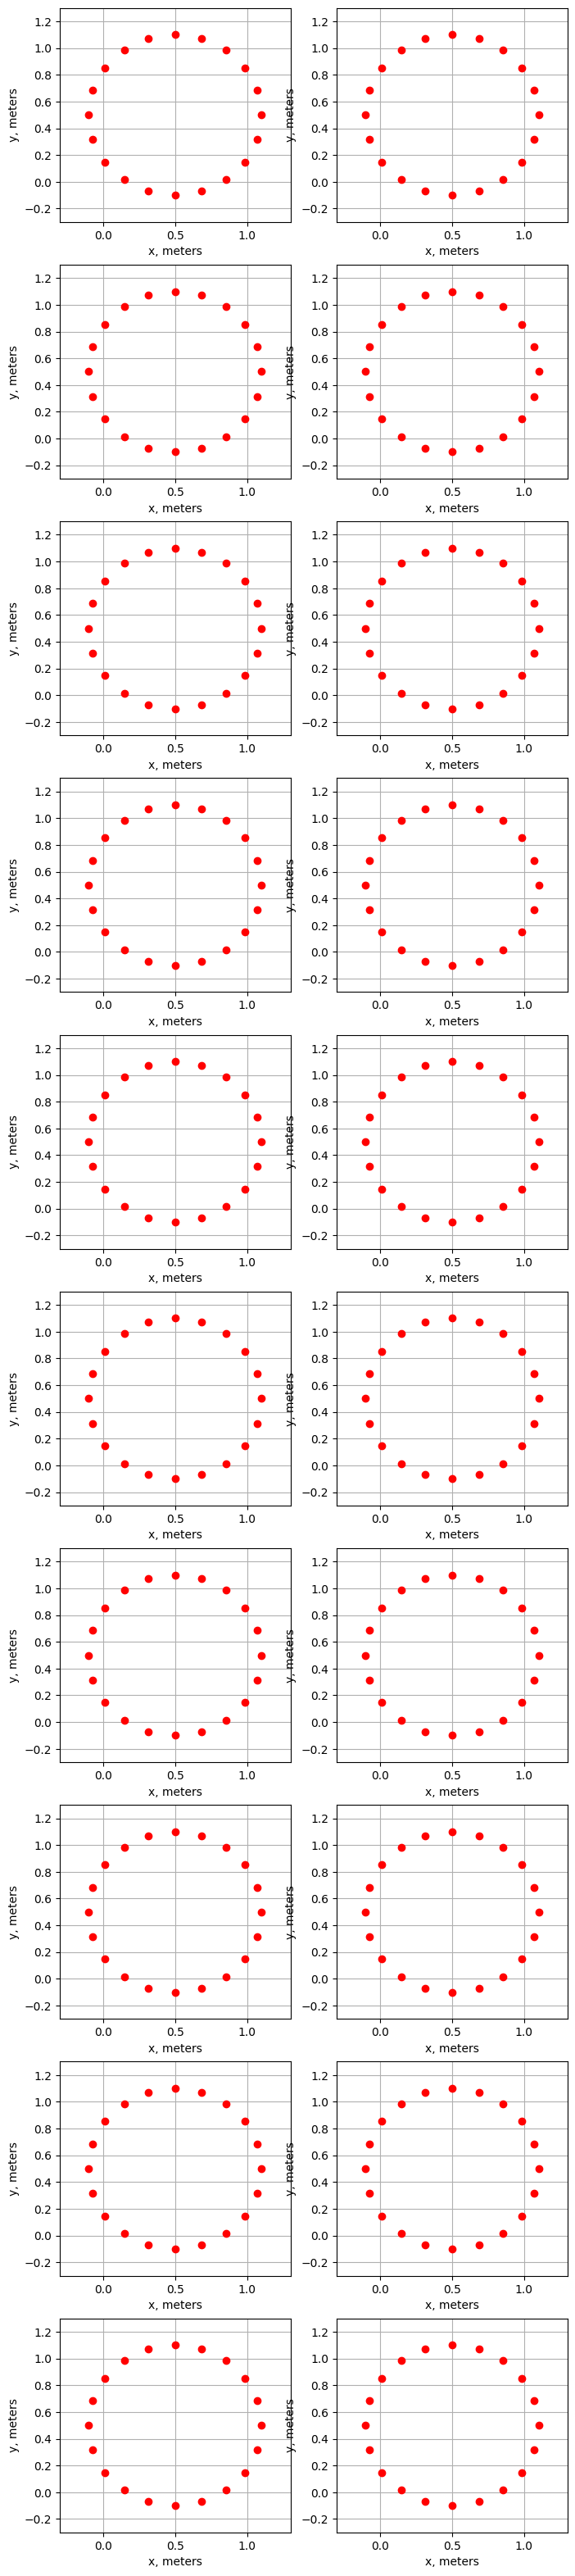

In [56]:
n_rows = (len(coord_points) + 1) // 2
fig, axs = plt.subplots(n_rows, 2, figsize=(8, n_rows * 4))
axs = axs.flatten()
for i, (x, y) in enumerate(coord_points):
    draw_background(axs[i], coord_points)